In [95]:
f = open('E:/视频qyp/【瑞客论坛 www.ruike1.com】网易云课堂 数据分析师Python进阶（完结）/00-0 QQ群资料/【非常重要】课程资料/CLASSDATA_ch02基础语言入门：从零开始学习Python/商铺数据.csv','r',encoding='utf8')

for i in f.readlines()[:5]:
    print(i.split(','))
    #查看数据

['\ufeffclassify', 'name', 'comment', 'star', 'price', 'address', 'commentlist\n']
['美食', '望蓉城老坛酸菜鱼(合生汇店)', '我要点评', '该商户暂无星级', '人均                                        ￥125', '翔殷路1099号合生汇5F', '口味8.3                                环境8.4                                服务8.5\n']
['美食', '泰国街边料理', '74                    条点评', '准四星商户', '人均                                        ￥48', '黄兴路合生汇B2美食集市内', '口味7.4                                环境7.6                                服务7.4\n']
['美食', '壹面如故(苏宁生活广场店)', '265                    条点评', '准四星商户', '人均                                        ￥21', '邯郸路585号苏宁生活广场B1层', '口味7.0                                环境7.2                                服务7.2\n']
['美食', '鮨谷•Aburiya(合生汇店)', '2748                    条点评', '准五星商户', '人均                                        ￥142', '翔殷路1099号合生广场5楼23、28铺位', '口味8.9                                环境8.5                                服务8.4\n']


In [96]:
#清洗字段
#创建comment，price，commentlist清洗函数

#函数式编程
def fcm(s):
    if '条' in s:
        return int(s.split('                    ')[0])
    else:
        return '缺失数据'
#comment清洗函数：用空格分段，选取结果list的第一个为点评数，并且转化为整数

def fpr(s):
    if '￥' in s:
        return float(s.split('￥')[-1])
    else:
        return '缺失数据'
#comment清洗函数：用￥分段，选取结果list的最后一个为人均价格，并且转化为浮点数

def fcl(s):
    if ' ' in s:
        quality = float(s.split('                                ')[0][2:])
        environment = float(s.split('                                ')[1][2:])
        service = float(s.split('                                ')[2][2:-1])
        return  quality,environment,service
    else:
        return '缺失数据'
#commentlist清洗函数：用空格分段，分别清洗出质量、环境及服务质量，并转化为浮点型

print('finish')

finish


In [97]:
#数据清洗

datalst = [] #创建空列表

f.seek(0)
n=0 #创建计数变量
for i in f.readlines()[1:10]:
    data = i.split(',')
    #print(data)
    classify = data[0]              #提取分类
    name = data[1]                  #提取店铺名称
    comment_count = fcm(data[2])    #提取评论数量
    star =data[3]                   #提取星级
    price = fpr(data[4])            #提取人均
    add  = data[5]                  #提取地址
    qua = fcl(data[6])[0]           #提取质量评分
    env = fcl(data[6])[1]           #提取环境评分
    ser = fcl(data[6])[2]           #提取服务评分
    if '缺失数据' not in [comment_count,price,qua]:     #用于判断是否有数据缺失
        n += 1
        data_re = [['classify',classify],
                   ['name',name],
                   ['comment_count',comment_count],
                   ['star',star],
                   ['price',price],
                   ['add',add],
                   ['qua',qua],
                   ['env',env],
                   ['ser',ser]]
        datalst.append(dict(data_re))       #生成字典并存入列表datalst
        print('成功加载%i条数据' %n)
    else:
        continue

print(datalst)
print('总共加载%i条数据' %n)


成功加载1条数据
成功加载2条数据
成功加载3条数据
成功加载4条数据
成功加载5条数据
成功加载6条数据
成功加载7条数据
[{'classify': '美食', 'name': '泰国街边料理', 'comment_count': 74, 'star': '准四星商户', 'price': 48.0, 'add': '黄兴路合生汇B2美食集市内', 'qua': 7.4, 'env': 7.6, 'ser': 7.4}, {'classify': '美食', 'name': '壹面如故(苏宁生活广场店)', 'comment_count': 265, 'star': '准四星商户', 'price': 21.0, 'add': '邯郸路585号苏宁生活广场B1层', 'qua': 7.0, 'env': 7.2, 'ser': 7.2}, {'classify': '美食', 'name': '鮨谷•Aburiya(合生汇店)', 'comment_count': 2748, 'star': '准五星商户', 'price': 142.0, 'add': '翔殷路1099号合生广场5楼23、28铺位', 'qua': 8.9, 'env': 8.5, 'ser': 8.4}, {'classify': '美食', 'name': '麦当劳(万达店)', 'comment_count': 785, 'star': '准四星商户', 'price': 24.0, 'add': '邯郸路600号万达商业广场B1楼A05号铺', 'qua': 7.4, 'env': 7.2, 'ser': 7.2}, {'classify': '美食', 'name': '蒸年青STEAMYOUNG(百联又一城购物中心店)', 'comment_count': 3779, 'star': '准五星商户', 'price': 70.0, 'add': '淞沪路8号百联又一城购物中心7层', 'qua': 8.6, 'env': 8.6, 'ser': 8.6}, {'classify': '美食', 'name': '丸来玩趣(百联又一城购物中心店)', 'comment_count': 458, 'star': '准四星商户', 'price': 14.0, 'add': '淞沪路8号

In [98]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


In [99]:
#如何用pandas 读取数据

df = pd.read_csv('E:/视频qyp/【瑞客论坛 www.ruike1.com】网易云课堂 数据分析师Python进阶（完结）/00-0 QQ群资料/【非常重要】课程资料/CLASSDATA_ch02基础语言入门：从零开始学习Python/商铺数据.csv')
print(type(df),df['name'].dtype)
df.head()

<class 'pandas.core.frame.DataFrame'> object


,classify,name,comment,star,price,address,commentlist
0,美食,望蓉城老坛酸菜鱼(合生汇店),我要点评,该商户暂无星级,人均 ￥125,翔殷路1099号合生汇5F,口味8.3 环境8.4 ...
1,美食,泰国街边料理,74 条点评,准四星商户,人均 ￥48,黄兴路合生汇B2美食集市内,口味7.4 环境7.6 ...
2,美食,壹面如故(苏宁生活广场店),265 条点评,准四星商户,人均 ￥21,邯郸路585号苏宁生活广场B1层,口味7.0 环境7.2 ...
3,美食,鮨谷•Aburiya(合生汇店),2748 条点评,准五星商户,人均 ￥142,翔殷路1099号合生广场5楼23、28铺位,口味8.9 环境8.5 ...
4,美食,我们的烤肉我们的馕,5 条点评,准四星商户,人均 -,邯郸路399-D3号,口味7.5 环境6.8 ...


In [100]:
#comment字段清洗
#将字段comment中包含条的数据筛选出来
df1=df[df['comment'].str.contains('条')]
#只保留条字前面的条数
df1['comment'] = df1['comment'].str.split('条').str[0]
#转换为整形
df1['comment']=df1['comment'].astype('int')
print(df1['comment'].dtype)
df1.head()

int32


,classify,name,comment,star,price,address,commentlist
1,美食,泰国街边料理,74,准四星商户,人均 ￥48,黄兴路合生汇B2美食集市内,口味7.4 环境7.6 ...
2,美食,壹面如故(苏宁生活广场店),265,准四星商户,人均 ￥21,邯郸路585号苏宁生活广场B1层,口味7.0 环境7.2 ...
3,美食,鮨谷•Aburiya(合生汇店),2748,准五星商户,人均 ￥142,翔殷路1099号合生广场5楼23、28铺位,口味8.9 环境8.5 ...
4,美食,我们的烤肉我们的馕,5,准四星商户,人均 -,邯郸路399-D3号,口味7.5 环境6.8 ...
5,美食,麦当劳(万达店),785,准四星商户,人均 ￥24,邯郸路600号万达商业广场B1楼A05号铺,口味7.4 环境7.2 ...


In [101]:
#price清洗
df1=df1[df1['price'].str.contains('￥')]
df1['price'] = df1['price'].str.split('￥').str[-1]
df1['price']=df1['price'].astype('float')
print(df1['price'].dtype)
df1.head(1)

float64


,classify,name,comment,star,price,address,commentlist
1,美食,泰国街边料理,74,准四星商户,48.0,黄兴路合生汇B2美食集市内,口味7.4 环境7.6 ...
2,美食,壹面如故(苏宁生活广场店),265,准四星商户,21.0,邯郸路585号苏宁生活广场B1层,口味7.0 环境7.2 ...
3,美食,鮨谷•Aburiya(合生汇店),2748,准五星商户,142.0,翔殷路1099号合生广场5楼23、28铺位,口味8.9 环境8.5 ...
5,美食,麦当劳(万达店),785,准四星商户,24.0,邯郸路600号万达商业广场B1楼A05号铺,口味7.4 环境7.2 ...
6,美食,蒸年青STEAMYOUNG(百联又一城购物中心店),3779,准五星商户,70.0,淞沪路8号百联又一城购物中心7层,口味8.6 环境8.6 ...


In [102]:
df1['q'] = df1['commentlist'].str.split('                                ').str[0].str[2:]
df1['e'] = df1['commentlist'].str.split('                                ').str[1].str[2:]
df1['s'] = df1['commentlist'].str.split('                                ').str[2].str[2:]
#删除字段
del df1['commentlist']
df1.head(1)

,classify,name,comment,star,price,address,q,e,s
1,美食,泰国街边料理,74,准四星商户,48.0,黄兴路合生汇B2美食集市内,7.4,7.6,7.4
2,美食,壹面如故(苏宁生活广场店),265,准四星商户,21.0,邯郸路585号苏宁生活广场B1层,7.0,7.2,7.2
3,美食,鮨谷•Aburiya(合生汇店),2748,准五星商户,142.0,翔殷路1099号合生广场5楼23、28铺位,8.9,8.5,8.4
5,美食,麦当劳(万达店),785,准四星商户,24.0,邯郸路600号万达商业广场B1楼A05号铺,7.4,7.2,7.2
6,美食,蒸年青STEAMYOUNG(百联又一城购物中心店),3779,准五星商户,70.0,淞沪路8号百联又一城购物中心7层,8.6,8.6,8.6


### 索引问题

In [103]:
#索引
#列索引：df[]
s = df1['name'].head()
print(type(s))
s

<class 'pandas.core.series.Series'>


1                       泰国街边料理
2                壹面如故(苏宁生活广场店)
3             鮨谷•Aburiya(合生汇店)
5                     麦当劳(万达店)
6    蒸年青STEAMYOUNG(百联又一城购物中心店)
Name: name, dtype: object

In [104]:
#多列索引
s2 = df1[['name','comment']]
print(type(s2))
s2

<class 'pandas.core.frame.DataFrame'>


,name,comment
1,泰国街边料理,74
2,壹面如故(苏宁生活广场店),265
3,鮨谷•Aburiya(合生汇店),2748
5,麦当劳(万达店),785
6,蒸年青STEAMYOUNG(百联又一城购物中心店),3779
...,...,...
1217,屈臣氏(苏宁电器广场店),22
1232,澳人坊(万达店),12
1237,奥卡索(东方商厦店),6
1240,TISSOT(巴黎春天店),17


In [105]:
#行索引：.iloc /  .loc
#.loc

In [106]:
import numpy as np
#df = pd.DataFrame(np.random.rand(12).reshape(3,4)*100)
df = pd.DataFrame(np.random.rand(12).reshape(3,4)*100,
                  index = ['one','two','three'],
                  columns = ['a','b','c','d'])
df

,a,b,c,d
one,42.832292,48.438952,30.436249,59.798388
two,96.769709,48.953634,99.338541,80.257174
three,11.270567,48.000410,23.221948,19.713756


In [107]:
#loc  首先按 one two three 去筛选
df.loc['two']
df.loc[['two','three']]

,a,b,c,d
two,96.769709,48.953634,99.338541,80.257174
three,11.270567,48.000410,23.221948,19.713756


In [108]:
#iloc
df.iloc[0]
df.iloc[[0,1]]


,a,b,c,d
one,42.832292,48.438952,30.436249,59.798388
two,96.769709,48.953634,99.338541,80.257174


In [109]:
#布尔型索引 :按判断条件去筛选 对某列的数据进行条件判断筛选
df1.head()



,classify,name,comment,star,price,address,q,e,s
1,美食,泰国街边料理,74,准四星商户,48.0,黄兴路合生汇B2美食集市内,7.4,7.6,7.4
2,美食,壹面如故(苏宁生活广场店),265,准四星商户,21.0,邯郸路585号苏宁生活广场B1层,7.0,7.2,7.2
3,美食,鮨谷•Aburiya(合生汇店),2748,准五星商户,142.0,翔殷路1099号合生广场5楼23、28铺位,8.9,8.5,8.4
5,美食,麦当劳(万达店),785,准四星商户,24.0,邯郸路600号万达商业广场B1楼A05号铺,7.4,7.2,7.2
6,美食,蒸年青STEAMYOUNG(百联又一城购物中心店),3779,准五星商户,70.0,淞沪路8号百联又一城购物中心7层,8.6,8.6,8.6


In [112]:
#df1[条件]
#df1[df1['comment']>50]
df1[df1['comment']>50][['name','q','e','s']].head(10)

,name,q,e,s
1,泰国街边料理,7.4,7.6,7.4
2,壹面如故(苏宁生活广场店),7.0,7.2,7.2
3,鮨谷•Aburiya(合生汇店),8.9,8.5,8.4
5,麦当劳(万达店),7.4,7.2,7.2
6,蒸年青STEAMYOUNG(百联又一城购物中心店),8.6,8.6,8.6
7,丸来玩趣(百联又一城购物中心店),7.0,6.5,6.5
8,韩国雪冰(合生汇店),7.7,7.5,7.6
9,小菜园新徽菜(五角场万达广场店),8.5,8.9,9.0
12,莆田餐厅(百联又一城购物中心店),8.0,8.4,8.0
13,旬彩(百联又一城购物中心店),7.2,7.1,7.2


### pandas 总结

In [116]:
#数据类型
s = pd.Series([122,153,23,33,45],index= ['a','b','c','d','e'])
s


a    122
b    153
c     23
d     33
e     45
dtype: int64

In [117]:
#Dataframe

data = {'name':['jack','tom','marry'],'age':[18,19,20],'gender':['m','w','m']}
data

{'name': ['jack', 'tom', 'marry'],
 'age': [18, 19, 20],
 'gender': ['m', 'w', 'm']}

In [118]:
frame =pd.DataFrame(data)
frame


,name,age,gender
0,jack,18,m
1,tom,19,w
2,marry,20,m


In [120]:
frame.index.tolist()

[0, 1, 2]

In [122]:
frame.columns.tolist()

['name', 'age', 'gender']

In [124]:
frame.values

numpy.ndarray

In [ ]:
type(frame.values)

In [ ]:
#如何创建

# 1、有数据直接读取，read_cav, read_excel

# 2、 字典创建，随机数+columns设置

In [126]:
df = pd.DataFrame({'values1':[2,2,2,26,2,4,5],'values2':[2,2,22,26,52,44,5],})

df


,values1,values2
0,2,2
1,2,2
2,2,22
3,26,26
4,2,52
5,4,44
6,5,5


In [127]:
df = pd.DataFrame(np.random.randn(100,2)*100,columns=['A','B'])
df.head()


,A,B
0,98.711924,56.201244
1,99.845067,-91.455275
2,-9.975081,-124.828745
3,-104.635472,86.438522
4,-10.586686,-27.457726


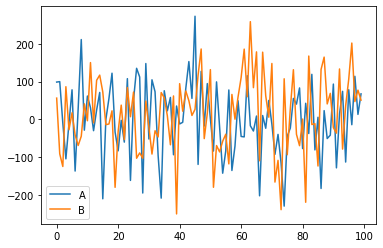

In [133]:
import  matplotlib.pyplot as plt
#% matplotlib inline

df.plot()
plt.grid()

In [136]:
#去重

s = pd.Series([1,1,1,1,2,2,2,3,3,3,4,4,4,5,5])
s.duplicated()

0     False
1      True
2      True
3      True
4     False
5      True
6      True
7     False
8      True
9      True
10    False
11     True
12     True
13    False
14     True
dtype: bool

In [138]:
s = pd.Series([1,1,1,1,2,2,2,3,3,3,4,4,4,5,5])
s[s.duplicated() == False]


0     1
4     2
7     3
10    4
13    5
dtype: int64

In [139]:
#替换

s = pd.Series(list('abbdasdsfdadff'))
#s.replace('a',np.nan)
s.replace(['a','s'],np.nan)


0     NaN
1       b
2       b
3       d
4     NaN
5     NaN
6       d
7     NaN
8       f
9       d
10    NaN
11      d
12      f
13      f
dtype: object

In [140]:
#替换

s = pd.Series(list('abbdasdsfdadff'))
s.replace({'a':'helloworld','s':123})


0     helloworld
1              b
2              b
3              d
4     helloworld
5            123
6              d
7            123
8              f
9              d
10    helloworld
11             d
12             f
13             f
dtype: object

In [141]:
#分组
df1.head(10)

,classify,name,comment,star,price,address,q,e,s
1,美食,泰国街边料理,74,准四星商户,48.0,黄兴路合生汇B2美食集市内,7.4,7.6,7.4
2,美食,壹面如故(苏宁生活广场店),265,准四星商户,21.0,邯郸路585号苏宁生活广场B1层,7.0,7.2,7.2
3,美食,鮨谷•Aburiya(合生汇店),2748,准五星商户,142.0,翔殷路1099号合生广场5楼23、28铺位,8.9,8.5,8.4
5,美食,麦当劳(万达店),785,准四星商户,24.0,邯郸路600号万达商业广场B1楼A05号铺,7.4,7.2,7.2
6,美食,蒸年青STEAMYOUNG(百联又一城购物中心店),3779,准五星商户,70.0,淞沪路8号百联又一城购物中心7层,8.6,8.6,8.6
7,美食,丸来玩趣(百联又一城购物中心店),458,准四星商户,14.0,淞沪路8号百联又一城购物中心B1层,7.0,6.5,6.5
8,美食,韩国雪冰(合生汇店),1280,四星商户,47.0,翔殷路1099号合生汇4F,7.7,7.5,7.6
9,美食,小菜园新徽菜(五角场万达广场店),85,准五星商户,81.0,邯郸路600号万达商业广场特力时尚汇3层,8.5,8.9,9.0
11,美食,阿满鸡排(合生汇店),30,四星商户,17.0,翔殷路1099号合生汇4层,7.9,8.0,7.7
12,美食,莆田餐厅(百联又一城购物中心店),988,四星商户,150.0,淞沪路8号百联又一城购物中心7层,8.0,8.4,8.0


In [145]:
#df1.groupby('star').count()
#以star分组，算price的平均值
df1.groupby('star')['price'].mean()

star
三星商户       411.000000
二星商户        39.000000
五星商户       669.242424
准五星商户      258.184615
准四星商户      303.988142
四星商户       235.508772
该商户暂无星级     40.000000
Name: price, dtype: float64

In [146]:
df1.groupby('star')['price'].count()



star
三星商户        36
二星商户         1
五星商户        33
准五星商户       65
准四星商户      253
四星商户       171
该商户暂无星级      1
Name: price, dtype: int64

In [151]:
#merge 合并 ————》 类似excel的vlookup

df1 = pd.DataFrame({'key':['K0','K1','K2','K3'],
                    'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3']})
df2 = pd.DataFrame({'key':['K0','K1','K2','K3'],
                    'C':['C0','C1','C2','C3'],
                    'D':['D0','D1','D2','D3']})
df3 = pd.DataFrame({'key1':['K0','K1','K2','K3'],
                    'key2':['K0','K1','K0','K1'],
                    'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3']})
df4 = pd.DataFrame({'key1':['K0','K1','K2','K3'],
                    'key2':['K0','K1','K0','K1'],
                    'C':['C0','C1','C2','C3'],
                    'D':['D0','D1','D2','D3']})

In [ ]:
df1

In [148]:
print(pd.merge(df1,df2,on='key'))
print('--------')

  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3
--------


In [152]:
#多个连接键
print(pd.merge(df3,df4,on=['key1','key2']))
print('--------')


  key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K1  A1  B1  C1  D1
2   K2   K0  A2  B2  C2  D2
3   K3   K1  A3  B3  C3  D3
--------
